# Week 7 Assignment

Rishav Chaudhary

Presidential Graduate School, Kathmandu, Nepal

PRG 330: Python Programming for Data

Professor Tek Raj Panta

December 8, 2024


# Task-1

## Exploring ``top 120 best-selling mobile phones.csv`` dataset

In [269]:
import pandas as pd

top_120_best_selling_mobile_phones = pd.read_csv("data/top 120 best-selling mobile phones.csv")

print(top_120_best_selling_mobile_phones.head())
print(top_120_best_selling_mobile_phones.info())


   Rank Manufacturer                Model  Form Factor  Smartphone?  Year  \
0     1        Nokia                 1100          Bar        False  2003   
1     2        Nokia                 1110          Bar        False  2005   
2     3        Apple    iPhone 6 & 6 Plus  Touchscreen         True  2014   
3     4        Nokia           105 Series          Bar        False  2013   
4     5        Apple  iPhone 6S & 6S Plus  Touchscreen         True  2015   

   Units Sold (million )  
0                  250.0  
1                  247.5  
2                  222.4  
3                  200.0  
4                  174.1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rank                   120 non-null    int64  
 1   Manufacturer           120 non-null    object 
 2   Model                  120 non-null    object 
 3   Form F

### Explanation
The dataset gives information regarding best selling mobile phones with their ranks, manufacturer's name, their model, their form factor. It also gives whether the model is smartphone or not and on which year was it manufactured. The amount on millions of each model is also given in float. We also understand it datatype of each columns.

## Data Cleaning

Data cleaning and preprocessing includes fixing Data Types, normalization of data, handling missing data and Performing Data Transformation. Let's check if there is missing values

In [270]:
# checking if the dataset has any missing values
print(top_120_best_selling_mobile_phones.isna().sum())

Rank                     0
Manufacturer             0
Model                    0
Form Factor              0
Smartphone?              0
Year                     0
Units Sold (million )    0
dtype: int64


The missing values were not found. So, focus should be to ensure there is consistent formatting, handling of potential outliers, and preparing the data for analysis and visualization

In [271]:
# checking for duplicated rows
print(top_120_best_selling_mobile_phones.duplicated().sum())

0


No, duplicated values were found.

In [272]:
top_120_best_selling_mobile_phones.rename(columns={"smartphone?":"smartphone", "Units Sold (million )":"unit_sold", "Form Factor":"form_factor"}, inplace=True)
top_120_best_selling_mobile_phones.head()

,Rank,Manufacturer,Model,form_factor,Smartphone?,Year,unit_sold
0,1,Nokia,1100,Bar,False,2003,250.0
1,2,Nokia,1110,Bar,False,2005,247.5
2,3,Apple,iPhone 6 & 6 Plus,Touchscreen,True,2014,222.4
3,4,Nokia,105 Series,Bar,False,2013,200.0
4,5,Apple,iPhone 6S & 6S Plus,Touchscreen,True,2015,174.1


## Data Analysis and Visualization

### Histogram of Units Sold

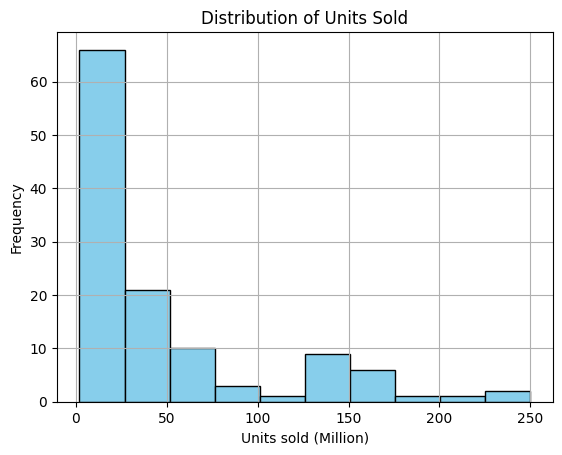

In [273]:
import matplotlib.pyplot as plt

plt.hist(top_120_best_selling_mobile_phones["unit_sold"], bins=10, color="skyblue", edgecolor="black")
plt.title("Distribution of Units Sold")
plt.xlabel("Units sold (Million)")
plt.ylabel("Frequency")
plt.grid()
plt.show()

## Bar Chart for Top Manufacturers

### Data preparation

- Grouping the data by ``Manufacturer`` and calculate the total units sold

In [274]:
# Grouping by "Manufacturer"
# summing the "Units Sold (million )" columns by manufacturers
# sorting values in descending 
top_manufacturers = top_120_best_selling_mobile_phones.groupby("Manufacturer")["unit_sold"].sum().sort_values(ascending=False)

# storing the top_10_manufacturers
top_10_manufacturers = top_manufacturers.head(10)
print("Top 10 manufacturers:\n")
print(top_10_manufacturers.head(10))

Top 10 manufacturers:

Manufacturer
Nokia            2374.5
Apple            1669.3
Samsung           994.5
Motorola          323.0
Huawei            113.8
Xiaomi             99.1
LG                 92.0
Sony Ericsson      45.0
Oppo               16.7
HTC                16.0
Name: unit_sold, dtype: float64


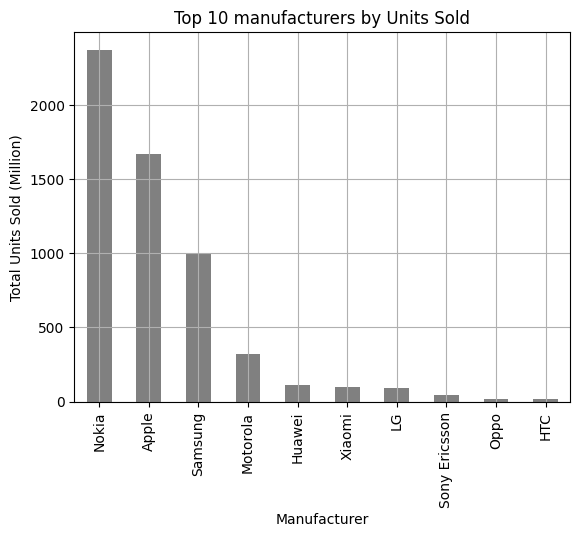

In [275]:
top_10_manufacturers.plot(kind="bar", color="grey")
plt.title("Top 10 manufacturers by Units Sold")
plt.xlabel("Manufacturer")
plt.ylabel("Total Units Sold (Million)")
plt.grid()
plt.show()

Nokia had the most selling of their phones.

## Yearly Trends in Units Sold

### Data preparation
- Grouping data by ``year``
- calculating the total units sold.

In [276]:
# calculating yearly_trends
yearly_trends = top_120_best_selling_mobile_phones.groupby("Year")["unit_sold"].sum()
print(yearly_trends)

Year
1996     60.0
1999    161.0
2000    126.0
2003    543.0
2004    440.0
2005    497.5
2006    158.0
2007    353.0
2008     70.0
2009    358.0
2010    175.0
2011    139.0
2012    256.2
2013    447.5
2014    236.9
2015    219.1
2016    267.0
2017    255.7
2018    271.6
2019    446.2
2020    240.9
2021     13.5
2022     10.9
2023     10.0
2024     10.0
Name: unit_sold, dtype: float64


### Line Plot for yearly Trends

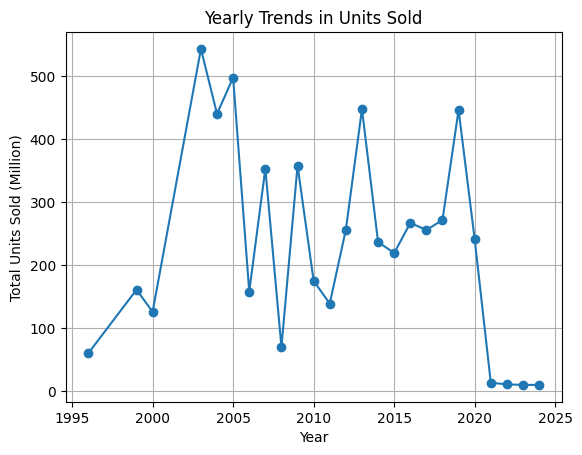

In [277]:
yearly_trends.plot(kind="line", marker="o")
plt.title("Yearly Trends in Units Sold")
plt.xlabel("Year")
plt.ylabel("Total Units Sold (Million)")
plt.grid()
plt.show()

we can see the year 2000 to year 2005 had the most units sold.

## Clustering Mobile Models by Sales Performance

### Extraction of columns 

In [278]:
data = top_120_best_selling_mobile_phones[["Model", "unit_sold"]]
X = data[["unit_sold"]]

### Normalization

For clustering, normalization of column ``Units Sold (million )`` will help for the better performance

In [279]:
from sklearn import preprocessing
x_norm = preprocessing.normalize(X)


### Applying K-means clustering

In [280]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto")
kmeans.fit(x_norm)


r:\rishav_folder\Present_assignment\PRG_330PythonProgramming\python-programming\.venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


KMeans(n_clusters=2, random_state=0)

### Visualize the cluster using a scatter plot

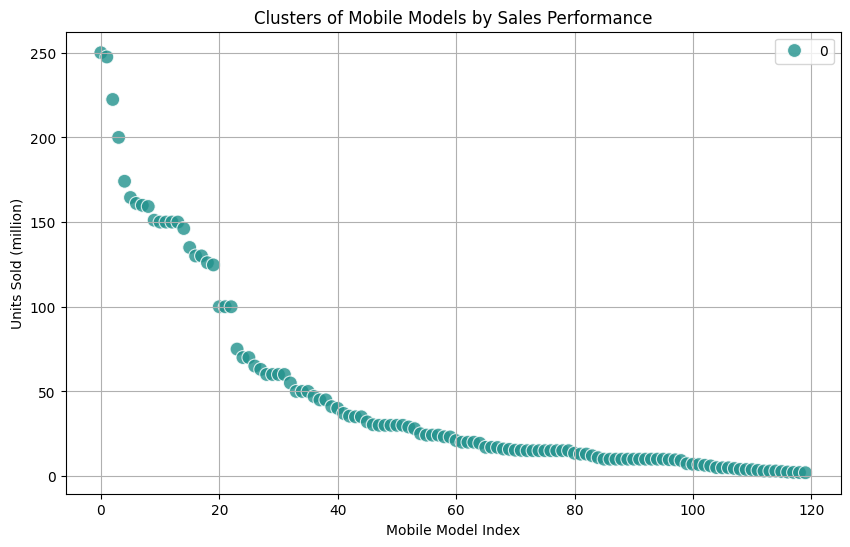

In [281]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=data.index,
    y=data["unit_sold"],
    hue=kmeans.labels_,
    palette="viridis",
    s=100,
    alpha=0.8
)
plt.title("Clusters of Mobile Models by Sales Performance")
plt.xlabel("Mobile Model Index")
plt.ylabel("Units Sold (million)")
plt.grid(True)
plt.show()

# Task 2

## Data Cleaning and Manipulation

### loading and inspecting data

In [282]:
binance_dataset = pd.read_csv("data/binance-dataset.csv")

print(binance_dataset.head())

       open_time     open     high      low    close        volume  \
0  1652400000000  0.00032  0.00049  0.00031  0.00047  4.032332e+08   
1  1652400060000  0.00047  0.00055  0.00042  0.00049  3.467135e+08   
2  1652400120000  0.00049  0.00052  0.00048  0.00051  2.064851e+08   
3  1652400180000  0.00052  0.00059  0.00051  0.00058  2.723594e+08   
4  1652400240000  0.00057  0.00060  0.00032  0.00035  5.888936e+08   

      close_time  quote_asset_volume  number_of_trades  \
0  1652400059999       163509.572433              1276   
1  1652400119999       171487.017111              1691   
2  1652400179999       103019.589015               976   
3  1652400239999       152790.423528              1163   
4  1652400299999       258685.424191              2566   

   taker_buy_base_asset_volume  taker_buy_quote_asset_volume  ignore  \
0                 2.233801e+08                  89172.973422       0   
1                 1.722357e+08                  85252.153831       0   
2             

In [283]:
print(binance_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5400 entries, 0 to 5399
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   open_time                     5400 non-null   int64  
 1   open                          5400 non-null   float64
 2   high                          5400 non-null   float64
 3   low                           5400 non-null   float64
 4   close                         5400 non-null   float64
 5   volume                        5400 non-null   float64
 6   close_time                    5400 non-null   int64  
 7   quote_asset_volume            5400 non-null   float64
 8   number_of_trades              5400 non-null   int64  
 9   taker_buy_base_asset_volume   5400 non-null   float64
 10  taker_buy_quote_asset_volume  5400 non-null   float64
 11  ignore                        5400 non-null   int64  
 12  open_time_utc                 5400 non-null   object 
 13  clo

### Handling Missing Data

In [284]:
# checking for missing values
print(binance_dataset.isnull().sum())

open_time                       0
open                            0
high                            0
low                             0
close                           0
volume                          0
close_time                      0
quote_asset_volume              0
number_of_trades                0
taker_buy_base_asset_volume     0
taker_buy_quote_asset_volume    0
ignore                          0
open_time_utc                   0
close_time_utc                  0
open_time_min                   0
close_time_min                  0
dtype: int64


No, missing data is found.

### Coverting time columns to Datetime Format
- converting ``open_time``, ``close_time``, ``open_time_utc``, and ``close_time_utc`` to datetime format

In [285]:

binance_dataset['open_time'] = pd.to_datetime(binance_dataset['open_time'], unit='ms')
binance_dataset['close_time'] = pd.to_datetime(binance_dataset['close_time'], unit='ms')
binance_dataset['open_time_utc'] = pd.to_datetime(binance_dataset['open_time_utc'])
binance_dataset['close_time_utc'] = pd.to_datetime(binance_dataset['close_time_utc'])


print(binance_dataset[['open_time', 'close_time', 'open_time_utc', 'close_time_utc']].head())


            open_time              close_time       open_time_utc  \
0 2022-05-13 00:00:00 2022-05-13 00:00:59.999 2022-05-13 00:00:00   
1 2022-05-13 00:01:00 2022-05-13 00:01:59.999 2022-05-13 00:01:00   
2 2022-05-13 00:02:00 2022-05-13 00:02:59.999 2022-05-13 00:02:00   
3 2022-05-13 00:03:00 2022-05-13 00:03:59.999 2022-05-13 00:03:00   
4 2022-05-13 00:04:00 2022-05-13 00:04:59.999 2022-05-13 00:04:00   

       close_time_utc  
0 2022-05-13 00:00:59  
1 2022-05-13 00:01:59  
2 2022-05-13 00:02:59  
3 2022-05-13 00:03:59  
4 2022-05-13 00:04:59  


## Data Visualization

### Plotting closing Price Over Time

Using ``close`` column for the closing price and ``open_time`` for the time.

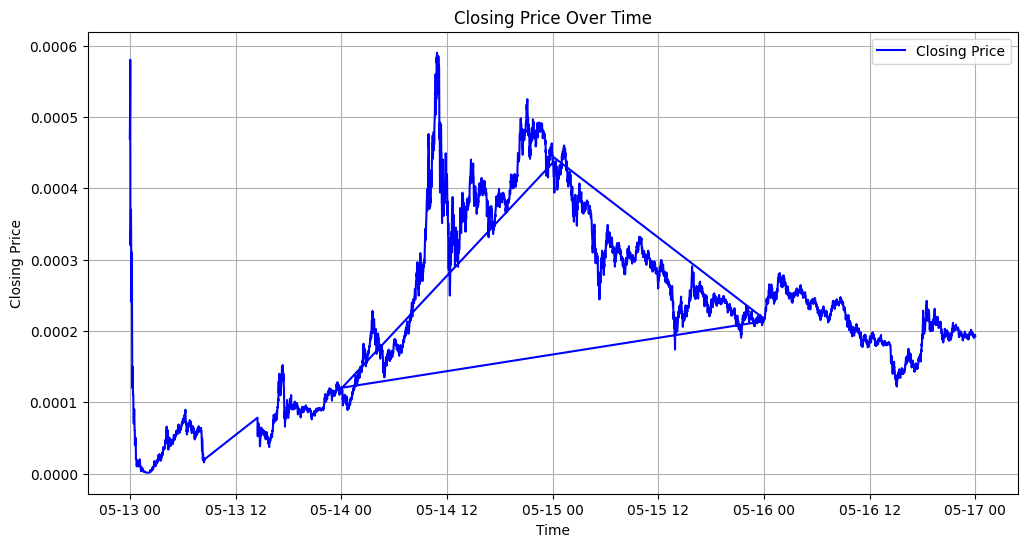

In [286]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(binance_dataset['open_time'], binance_dataset['close'], label='Closing Price', color='blue')
plt.title('Closing Price Over Time')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()
plt.grid()
plt.show()


### Plotting Total Trading Volume Over Time

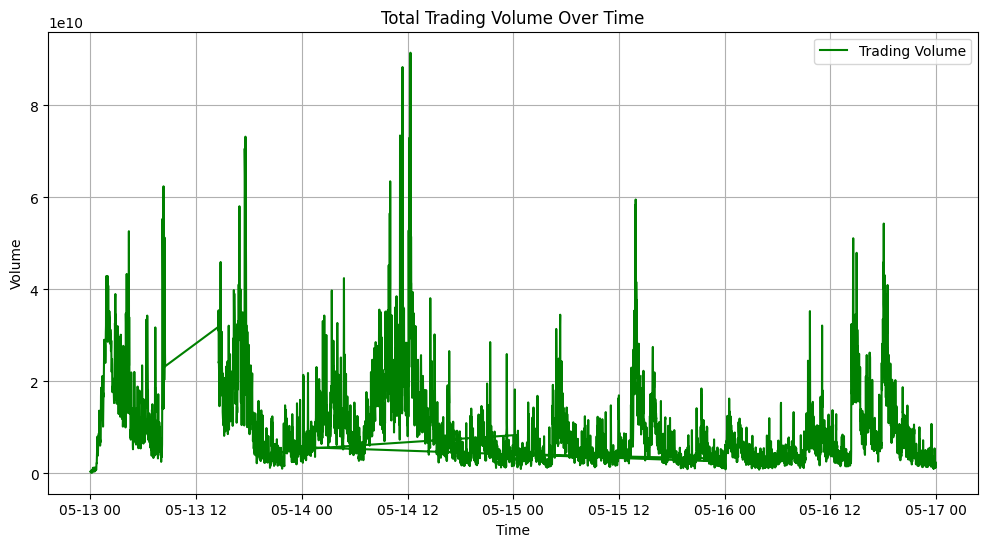

In [287]:
# Using volume column for trading volume over time
plt.figure(figsize=(12, 6))
plt.plot(binance_dataset['open_time'], binance_dataset['volume'], label='Trading Volume', color='green')
plt.title('Total Trading Volume Over Time')
plt.xlabel('Time')
plt.ylabel('Volume')
plt.legend()
plt.grid()
plt.show()


## Data Analysis

### Identifying date and time when the maximum and minimum closing prices occured

In [288]:
# Maximum closing price
max_close = binance_dataset.loc[binance_dataset["close"].idxmax()]
print(f"Maximum Closing price is {max_close["close"]}\nDate and Time is {max_close["close_time_utc"]}")

print("")

# Minimum closing price
min_close = binance_dataset.loc[binance_dataset["close"].idxmin()]
print(f"Minimum closing price is {min_close["close"]}\nDate and Time is {min_close["close_time_utc"]}")

Maximum Closing price is 0.00058997
Date and Time is 2022-05-14 10:53:59

Minimum closing price is 1.12e-06
Date and Time is 2022-05-13 02:00:59


### Calculating the average volume traded by the day of the week

In [289]:
# adding 'day_of_week' column
binance_dataset['day_of_week'] = pd.to_datetime(binance_dataset['open_time']).dt.day_name()

# calculating average volume by day of the week
avg_volume_by_day = binance_dataset.groupby('day_of_week')['volume'].mean()

# sorting the days in the correct order
avg_volume_by_day = avg_volume_by_day.reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

### creating bar plot

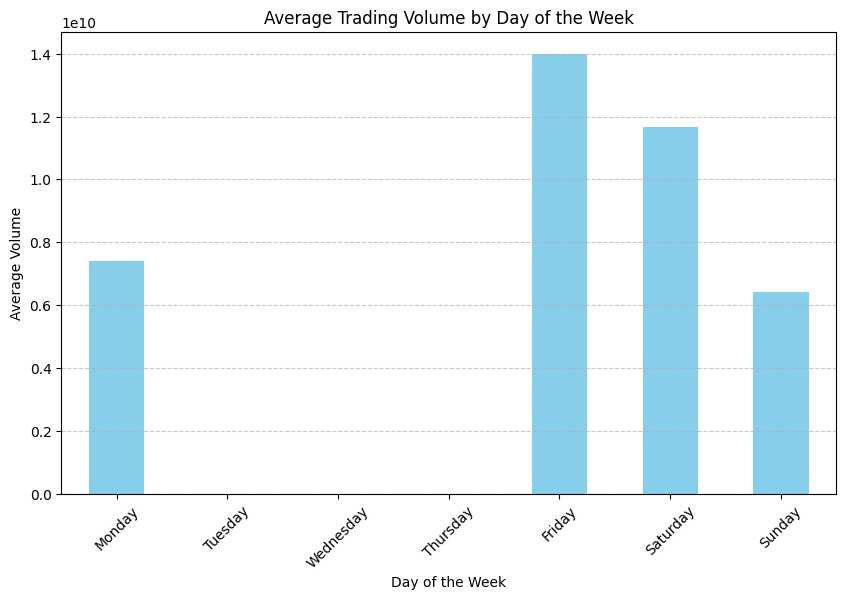

In [290]:
plt.figure(figsize=(10, 6))
avg_volume_by_day.plot(kind='bar', color='skyblue')
plt.title('Average Trading Volume by Day of the Week')
plt.ylabel('Average Volume')
plt.xlabel('Day of the Week')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Building Linear Regression to Predict Closing Price

In [291]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# for features and targets
features = ['open', 'high', 'low', 'volume']
target = 'close'

# splitting into train_test
X = binance_dataset[features]
y = binance_dataset[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting
y_pred = model.predict(X_test)

# Evaluating using mean squared error, and r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# for coefficients
coefficients = pd.DataFrame(model.coef_, index=features, columns=['Coefficient'])
print(coefficients)


Mean Squared Error: 1.2269135979794855e-11
R^2 Score: 0.9991701731780982
         Coefficient
open    4.680811e-02
high    4.354625e-02
low     9.235173e-01
volume  1.873501e-16
